<a href="https://colab.research.google.com/github/DeseoDeSEo/colab/blob/main/ex01_%EC%9C%A0%EB%B0%A9%EC%95%94_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EB%A5%98(%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 목표
- 환자 데이터를 바탕으로 유방암인지 아닌지를 구분해보자
- 딥러닝으로 이진분류 실습을 진행하자.


In [ ]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer # 사이킷런 내장 유방암데이터


In [ ]:
# 데이터 불러오기
breast_data =load_breast_cancer()
breast_data
# 머신러닝 데이터 구조 : 번치객체( 딕셔너리 형태 )

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
breast_data.keys()
# data: 문제 데이터, 입력특성
# target: 정답데이터
# target_names: 정답데이터의 이름

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
breast_data.target_names
# 0 ➜ 'malignant(악성)'
# 1 ➜ 'benign'(양성)
#class의 개수는 2개 ➜ 이진 분류 !

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
# 문제, 정답 분리
# 문제 데이터는 x에, 정답 데이터는 y에
X = breast_data['data']
y = breast_data['target']

In [ ]:
# train, test로 분리
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=919)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
# 입력 특성( 컬럼의 개수)는 30개

(455, 30) (455,)
(114, 30) (114,)


# < 모델링 과정 >
## 1. 신경망 구조 설계( 뼈대, 입력층, 중간층, 출력층 )
## 2. 신경망 모델 학습/평가 방법 설정 (회귀, 분류)
## 3. 모델 학습
## 4. 모델 예측 및 평가

In [ ]:
from tensorflow.keras.models import Sequential # 뼈대

from tensorflow.keras.layers import InputLayer, Dense

In [ ]:
# 1. 신경망 구조 설계( 뼈대, 입력층, 중간층, 출력층 )
# 뼈대
model = Sequential()
# 입력층
model.add(InputLayer(input_shape=(30,))) # 입력층( 입력 특성의 개수를 정확하게 작성해야함.)
# 중간층(은닉층)
model.add(Dense(units=16, activation='sigmoid'))
model.add(Dense(units=8, activation='sigmoid'))
# 출력층 (출력받고 싶은 데이터 형태를 지정하는 곳임.) , 이진분류 1개의 확률값으로 결과값으로 받고 싶음.
# 분류는 확률적인 값을 출력.
# 다중분류는 직선이 여러개 필요함.
model.add(Dense(units=1,activation='sigmoid'))
# sigmoid의 역할은 중간층에서는 역치의 역할? 출력층에서는 이진분류 1개의 확률값으로 결과값으로 변환시켜줌.
# sigmoid함수는 0에서 1사이의 함수이며, 값이 들어오면 0~1사이의 값을 반환함..
# sigmoid : S자형 곡선을 가지는 함수로 0~1사이의 값을 반환 !
# 선형모델의 결과값: 연속형 값 !


### * 활성화함수는 중간층, 출력층에서 사용됨,
#### 중간층 : 역치 역활( 활성화, 비활성화할지?)
#### step function ➜ sigmoid사용.(왜? 최적화 알고리즘 경사하강법을 적용하기 위해서 기울기와 역치 개념을 가지는 sigmoid를 사용하기 위해서)

#### 출력층 : 최종결과의 데이터 형태를 결정
#### (내가 출력하고자 하는 형태에 따라 다르게 작성, units/activation)

In [ ]:
# 2.모델학습 및 평가방법 결정
model.compile(loss='binary_crossentropy',  # 오차: 이진분류➜ binary_crossentropy
              optimizer='SGD', # 최적화 알고리즘(확률적 경사하강법)
              metrics=['accuracy']) # metrics : 평가방법( 분류: 정확도)

In [ ]:
# 3.모델 학습 및 시각화
h1=model.fit(X_train, y_train,validation_split=0.2, epochs=100)

Epoch 1/100
12/12 [==============================] - 0s 9ms/step - loss: 0.6505 - accuracy: 0.6456 - val_loss: 0.6820 - val_accuracy: 0.5934
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6506 - accuracy: 0.6456 - val_loss: 0.6821 - val_accuracy: 0.5934
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 0.6505 - accuracy: 0.6456 - val_loss: 0.6823 - val_accuracy: 0.5934
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6506 - accuracy: 0.6456 - val_loss: 0.6827 - val_accuracy: 0.5934
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6505 - accuracy: 0.6456 - val_loss: 0.6828 - val_accuracy: 0.5934
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 0.6504 - accuracy: 0.6456 - val_loss: 0.6829 - val_accuracy: 0.5934
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 0.6505 - accuracy: 0.6456 - val_loss: 0.6830 - val_accuracy: 0.5934
Epoch 8/100
1

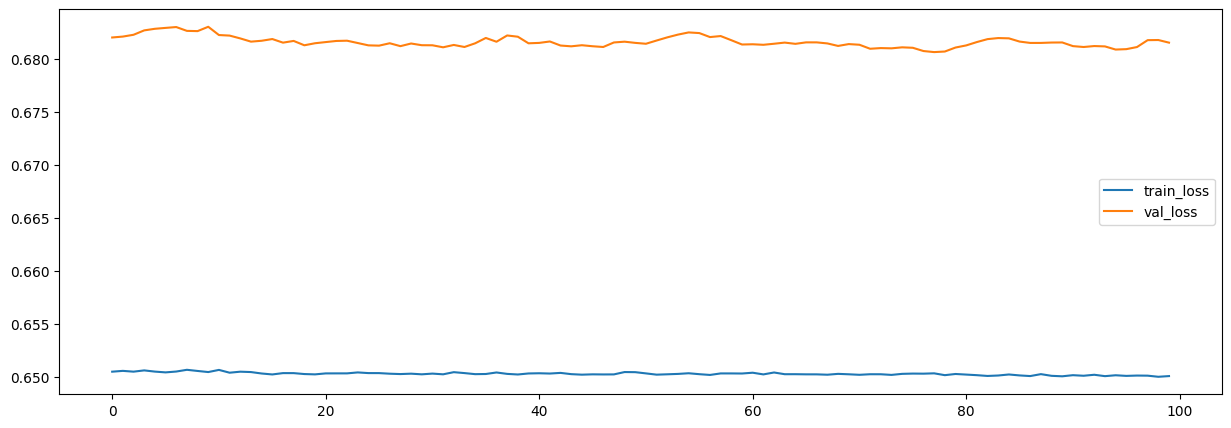

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(h1.history['loss'],label='train_loss')
plt.plot(h1.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
# 모델에 대한 전체적인 내부 구조 확인
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 회귀모델은 성적을 예측, 분류 모델은 ~~? 이니? 아니니?
## 연속형데이터는 회귀 ,
### [출력형태에 따른 unit의 개수 ]
#### - 회귀: units  = 1
###- 이진분류 : units = 1

### [출력 형태에 따른 활성화함수의 종류 ]
#### - 회귀: linear() ➜ 항등함수, y=x의 선형 모델을 사용. 선형모델이 예측한 데이터를 그대로 출력. 기본값이라서 적어주지 않ㅎ아도 괜찮다.
#### -이진분류 : sigmoid ➜ 0~1사이의 확률값으로 출력 받기 위함.